# 3D schematic

## 3D arrows just like in 2D

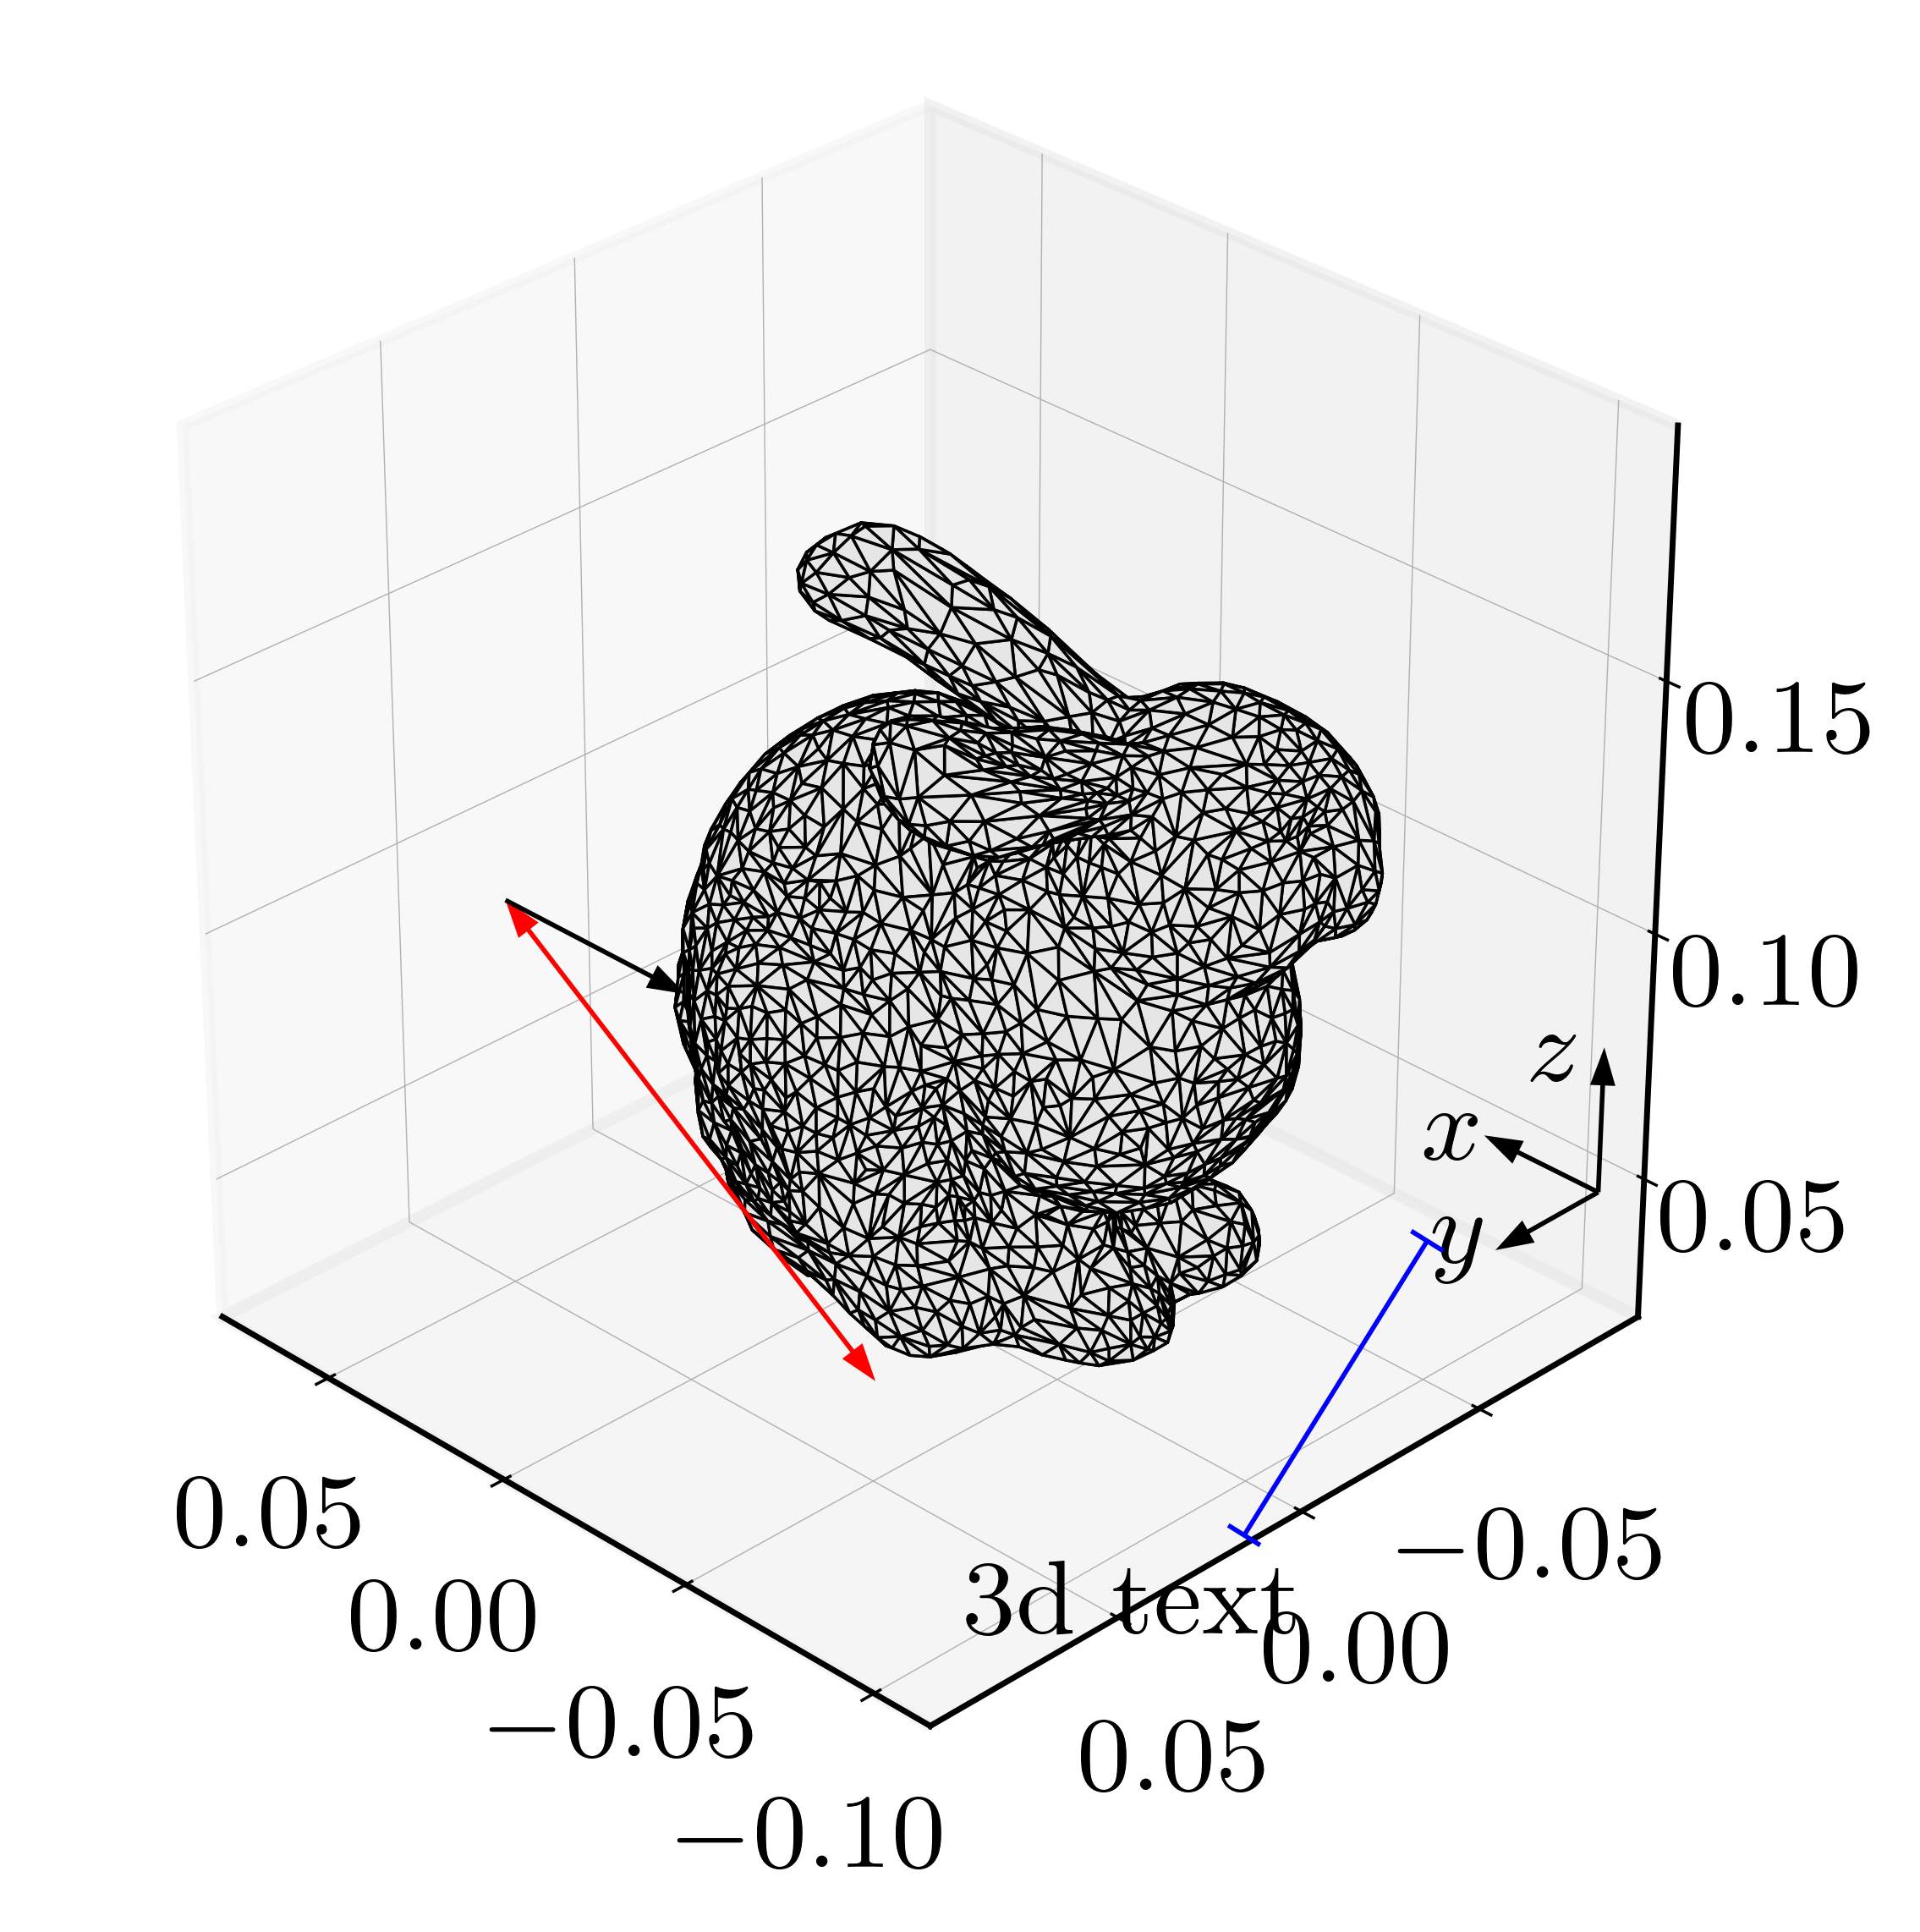

In [ ]:
# import stanford bunny and draw some arrows in 3d

import matplotlib.pyplot as plt
import s3dlib.surface as s3d
from cm_vis.scheme.basic3d import Scheme3D

plt.style.use("elsevier3d")
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d", aspect="equal")

scheme = Scheme3D(ax, lw=0.4)  # just like Scheme for 2D ...

# we rely on s3dlib to handle 3d surface plot form obj file (which can be exported from ParaView easily)
surf = s3d.get_surfgeom_from_obj("./sample_data/bunny.obj", color=".9", edgecolor="k", lw=0.25)
s3d.auto_scale(ax, surf, uscale=1.1)
ax.add_collection3d(surf)

# test arrows and text for annotation
scheme.add_arrow("latex-latex", xyz=[[0, 0, 0], [0.05, 0.05, 0.1]], fc="r")
scheme.add_arrow("bar-bar", xyz=[[-0.1, -0.05, 0.05], [-0.1, 0, 0.01]], fc="b")
scheme.add_arrow("-latex", xyz=[[0.05, 0.05, 0.1], [0, 0.05, 0.1]])
scheme.add_text([-0.05, 0.05, 0], "3d text", offset=[0.0, 0.0, 0.0])
scheme.add_coord_axis(shift=0.9, origin=[-0.1, -0.1, 0.04], length=[0.03, 0.03, 0.03])
ax.view_init(azim=135)